#Nueral Network Assignment-1
###Tejus Vidyadhar Kusur

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#Loading training and testing datasets
training_df = pd.read_excel("Datasheets/training_feature_matrix.xlsx", header=None)
x_train_orig = training_df.to_numpy()
train_op_df = pd.read_excel("Datasheets/training_output.xlsx", header=None)
y_train_orig = train_op_df.to_numpy()
y_train_orig = np.delete(y_train_orig, 0)
y_train_orig = y_train_orig.reshape([-1,1])
testing_df = pd.read_excel("Datasheets/test_feature_matrix.xlsx", header=None)
x_test_orig = testing_df.to_numpy()
test_op_df = pd.read_excel("Datasheets/test_output.xlsx", header=None)
y_test_orig = test_op_df.to_numpy()

assert(x_train_orig.shape[0] == y_train_orig.shape[0])

In [3]:
#Normalising function using the min-max normalization
def normalize(features):
    """min-max normalization of provided feature matrix

    Args:
        features (matrix): a matrix of input parameters x1, x2, ... xn

    Returns:
        features: normalized feature matrix
        fmin: calculated minimum
        frange: calculated range
    """

    fmin = np.min(features)
    frange = np.max(features, axis=0) - np.min(features, axis=0)
    features -= fmin

    features /= frange

    return features, fmin, frange

In [4]:
#Normalising the datasets using the normalising function
x_train_normalized, _, _ = normalize(x_train_orig)
x_test_normalized, _, _ = normalize(x_test_orig)
y_train, y_train_fmin, y_train_frange = normalize(y_train_orig)
y_test, y_test_fmin, y_test_frange = normalize(y_test_orig)


In [15]:
def denormalize(features, fmin, frange):
    """min-max de-normalization of provided feature matrix

    Args:
        features (matrix): a normalized matrix of input parameters x1, x2, ... xn
        fmin: calculated minimum
        frange: calculated range

    Returns:
        features: de-normalized feature matrix
        
    """
    features = features * frange
    features = features - fmin
    return features

In [6]:
#Adding ones for the bias column and calculating the number of elements for batch grade descent
m_train = x_train_normalized.shape[0]
m_test = x_test_normalized.shape[0]
x_train = np.insert(x_train_normalized, 0, np.ones(m_train), axis=1)
x_test = np.insert(x_test_normalized, 0, np.ones(m_test), axis=1)

In [7]:
#Hypothesis function
def hypothesis(theta, x):
    """hypothesis function for linear regression

    Args:
        theta ([float]): an array of weights; size n
        x ([float]): feature element for making predictions

    Returns:
        [float]: array of predicted output values for calculating MSE
    """

    hw = 0
    for i in range(theta.shape[0]):
      hw += theta[i] * x[i]
    return hw

##Question 1

In [8]:
def propagate(theta, X, Y):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    cost -- cost for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    m = X.shape[0]
    n = theta.shape[0]
    cost = 0
    grad = np.zeros([n,1])
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        #hw = 0
        #for j in range(n):
        #    hw += theta[j] * X[i][j]
        hw = hypothesis(theta, X[i])

        cost += 1/(2*m) * ((hw - Y[i]) ** 2) #compute cost
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        for j in range(n):
            grad[j] = grad[j] + 1/m * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

    assert(grad.shape == theta.shape)
    cost = np.squeeze(cost)

    return grad, cost

In [9]:
def optimize(theta, X, Y, num_iter, alpha):
    """
    This function optimizes theta by running a batch gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    costlist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,3])
    
    for i in range(num_iter):
        
        # Cost and gradient calculation
        grad, cost = propagate(theta, X, Y)
        
        # update rule 
        for j in range(theta.shape[0]):
            theta[j] = theta[j] - alpha * grad[j]

        costlist[i] = np.squeeze(cost)
        thetalist[i] = np.squeeze(theta)
        
        # Print the cost every 100 training iterations
        if i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return theta, thetalist, costlist

In [10]:
#Main Implementation
alpha = 0.01
num_iter = 100
theta = np.zeros(shape=[x_train.shape[1], 1])

theta, thetalist, costlist = optimize(theta, x_train, y_train, num_iter, alpha)
print("Final Weight parameters (normalized):", np.squeeze(theta))

Cost after iteration 0: 0.083645
Cost after iteration 20: 0.035943
Cost after iteration 40: 0.024770
Cost after iteration 60: 0.022151
Cost after iteration 80: 0.021535
Final Weight parameters (normalized): [0.09379751 0.09082635 0.12683799]


Text(0, 0.5, &#39;cost&#39;)

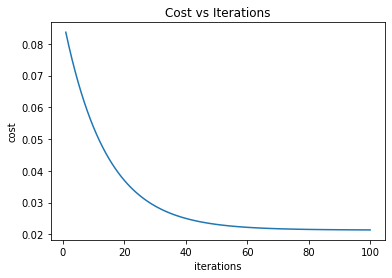

In [11]:
m = [x for x in range(1, num_iter+1)]
plt.plot(m, costlist)
plt.title("Cost vs Iterations")
plt.xlabel('iterations')
plt.ylabel('cost')

Text(0.5, 0, &#39;Theta2&#39;)

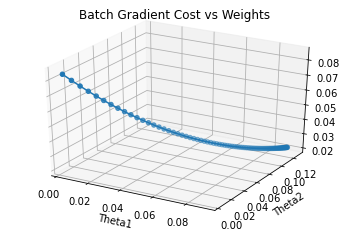

In [12]:
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
thetaX = thetalist[:,1]
thetaY = thetalist[:,2]
costlist = np.squeeze(costlist)
ax.scatter(thetaX, thetaY, costlist)
ax.plot(thetaX, thetaY, costlist)
plt.title("Batch Gradient Cost vs Weights")
plt.xlabel("Theta1")
plt.ylabel("Theta2")

In [16]:
# printing training and testing mse values

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 18.243432322087724
Testing MSE: 20.522998630185523


##Question 2##

In [18]:
#Stochastic propagation
def stoc_propagate(theta, X, Y, alpha):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    cost -- cost for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    m = X.shape[0]
    n = theta.shape[0]
    cost = 0
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        hw = hypothesis(theta, X[i])

        cost += 1/(2*m) * ((hw - Y[i]) ** 2) #compute cost
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        # update rule 
        for j in range(n):
            theta[j] = theta[j] - alpha * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

        #theta = theta - (alpha * ((hw - Y[i]) * X[i])

    cost = np.squeeze(cost)

    return theta, cost

In [19]:
#Stochastic optimisation
def stoc_optimize(theta, X, Y, num_iter, alpha):
    """
    This function optimizes theta by running a stochastic gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    costlist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,3])
    
    for i in range(num_iter):
        
        # Cost and gradient calculation
        theta, cost = stoc_propagate(theta, X, Y, alpha)

        costlist[i] = np.squeeze(cost)
        thetalist[i] = np.squeeze(theta)
        
        # Print the cost every 100 training iterations
        if i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return theta, thetalist, costlist

In [20]:
#Stochastic Main Implementation
alpha = 0.01
num_iter = 100
theta = np.zeros(shape=[x_train.shape[1], 1])

theta, thetalist, costlist = stoc_optimize(theta, x_train, y_train, num_iter, alpha)
print("Final Weight parameters (normalized):", np.squeeze(theta))

Cost after iteration 0: 0.021743
Cost after iteration 20: 0.019454
Cost after iteration 40: 0.019449
Cost after iteration 60: 0.019454
Cost after iteration 80: 0.019457
Final Weight parameters (normalized): [-0.05222684  0.04929261  0.2302733 ]


Text(0, 0.5, &#39;cost&#39;)

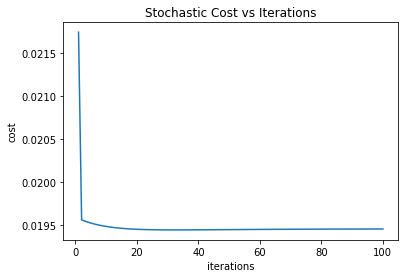

In [21]:
#Stochastic cost vs iterations
m = [x for x in range(1, num_iter+1)]
plt.plot(m, costlist)
plt.title("Stochastic Cost vs Iterations")
plt.xlabel('iterations')
plt.ylabel('cost')

Text(0.5, 0, &#39;Theta2&#39;)

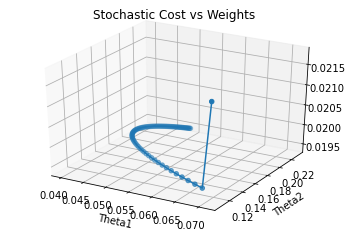

In [22]:
# Stochastic 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
thetaX = thetalist[:,1]
thetaY = thetalist[:,2]
costlist = np.squeeze(costlist)
ax.scatter(thetaX, thetaY, costlist)
ax.plot(thetaX, thetaY, costlist)
plt.title("Stochastic Cost vs Weights")
plt.xlabel("Theta1")
plt.ylabel("Theta2")

In [23]:
# printing training and testing mse values for stochastic descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 28.3841496061412
Testing MSE: 22.7238381843817


In [174]:
#Mini batch propagation

def mini_propagate(theta, X, Y, m):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    cost -- cost for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    n = theta.shape[0]
    cost = 0
    grad = np.zeros([n,1])
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        #hw = 0
        #for j in range(n):
        #    hw += theta[j] * X[i][j]
        hw = hypothesis(theta, X[i])

        cost += 1/(2*m) * ((hw - Y[i]) ** 2) #compute cost
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        for j in range(n):
            grad[j] = grad[j] + 1 / m * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

    assert(grad.shape == theta.shape)
    cost = np.squeeze(cost)

    return grad, cost

In [175]:
#Mini batch optimisation

def mini_optimize(theta, X, Y, num_iter, alpha, m):
    """
    This function optimizes theta by running a mini batch gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    costlist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,3])
    
    for i in range(num_iter):
        
        Xbatch = np.random.permutation(X)[0:m]

        # Cost and gradient calculation
        grad, cost = mini_propagate(theta, Xbatch, Y, m)
        
        # update rule 
        for j in range(theta.shape[0]):
            theta[j] = theta[j] - alpha * grad[j]

        costlist[i] = np.squeeze(cost)
        thetalist[i] = np.squeeze(theta)
        
        # Print the cost every 100 training iterations
        if i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return theta, thetalist, costlist

In [176]:
#Mini batch main Implementation
alpha = 0.01
num_iter = 100
m = 20 #batch size
theta = np.zeros(shape=[x_train.shape[1], 1])

theta, thetalist, costlist = mini_optimize(theta, x_train, y_train, num_iter, alpha, m)
print("Final Weight parameters (normalized):", np.squeeze(theta))

Cost after iteration 0: 0.031944
Cost after iteration 20: 0.014035
Cost after iteration 40: 0.009647
Cost after iteration 60: 0.008764
Cost after iteration 80: 0.007618
Final Weight parameters: [0.06136566 0.05735786 0.07417338]


Text(0, 0.5, &#39;cost&#39;)

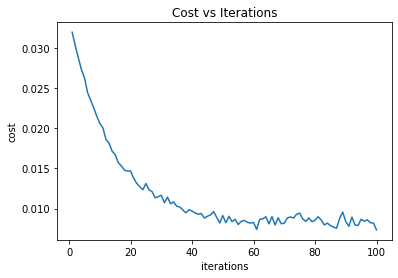

In [100]:
#Mini batch cost vs iterations
m = [x for x in range(1, num_iter+1)]
plt.plot(m, costlist)
plt.title("Mini Batch Cost vs Iterations")
plt.xlabel('Iterations')
plt.ylabel('Cost')

Text(0.5, 0, &#39;Theta2&#39;)

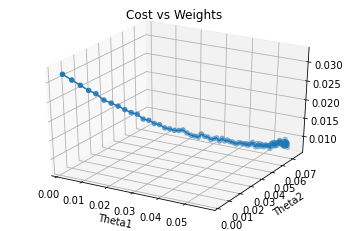

In [101]:
# Mini batch 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
thetaX = thetalist[:,1]
thetaY = thetalist[:,2]
costlist = np.squeeze(costlist)
ax.scatter(thetaX, thetaY, costlist)
ax.plot(thetaX, thetaY, costlist)
plt.title("Mini Batch Cost vs Weights")
plt.xlabel("Theta1")
plt.ylabel("Theta2")

In [24]:
# printing training and testing mse values for mini batch descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 28.3841496061412
Testing MSE: 22.7238381843817


##Question 3##

In [177]:
#Ridge batch gradient regression progression function

def ridge_batch_propagate(theta, X, Y):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    cost -- cost for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    m = X.shape[0]
    n = theta.shape[0]
    cost = 0
    grad = np.zeros([n,1])
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        #hw = 0
        #for j in range(n):
        #    hw += theta[j] * X[i][j]
        hw = hypothesis(theta, X[i])

        cost += 1/(2*m) * ((hw - Y[i]) ** 2) #compute cost
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        for j in range(n):
            grad[j] = grad[j] + 1 / m * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

    assert(grad.shape == theta.shape)
    cost = np.squeeze(cost)

    return grad, cost

In [178]:
#Ridge batch gradient regression optimisation function

def ridge_batch_optimize(theta, X, Y, num_iter, alpha, _lambda):
    """
    This function optimizes theta by running a ridge batch gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    costlist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,3])
    
    for i in range(num_iter):
        
        # Cost and gradient calculation
        grad, cost = ridge_batch_propagate(theta, X, Y)
        
        # update rule 
        for j in range(theta.shape[0]):
            theta[j] = ((1 - alpha * _lambda) * theta[j]) - alpha * grad[j]

        costlist[i] = np.squeeze(cost)
        thetalist[i] = np.squeeze(theta)
        
        # Print the cost every 100 training iterations
        if i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return theta, thetalist, costlist

In [179]:
#Ridge batch descent main Implementation
alpha = 0.01
_lambda = 0.25
num_iter = 100
theta = np.zeros(shape=[x_train.shape[1], 1])

theta, thetalist, costlist = ridge_batch_optimize(theta, x_train, y_train, num_iter, alpha, _lambda)
print("Final Weight parameters (normalized):", np.squeeze(theta))

Cost after iteration 0: 0.083645
Cost after iteration 20: 0.036610
Cost after iteration 40: 0.025656
Cost after iteration 60: 0.022871
Cost after iteration 80: 0.022065
Final Weight parameters: [0.08831544 0.08548535 0.11910834]


Text(0, 0.5, &#39;Cost&#39;)

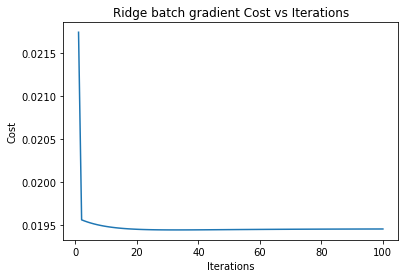

In [27]:
m = [x for x in range(1, num_iter+1)]
plt.plot(m, costlist)
plt.title("Ridge batch gradient Cost vs Iterations")
plt.xlabel('Iterations')
plt.ylabel('Cost')

Text(0.5, 0, &#39;Theta2&#39;)

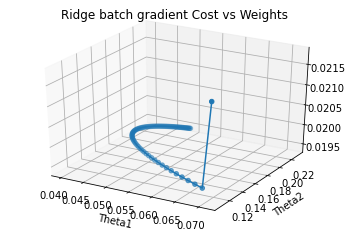

In [28]:
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
thetaX = thetalist[:,1]
thetaY = thetalist[:,2]
costlist = np.squeeze(costlist)
ax.scatter(thetaX, thetaY, costlist)
ax.plot(thetaX, thetaY, costlist)
plt.title("Ridge batch gradient Cost vs Weights")
plt.xlabel("Theta1")
plt.ylabel("Theta2")

In [30]:
# printing training and testing mse values for ridge batch descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 28.3841496061412
Testing MSE: 22.7238381843817


In [31]:
#Ridge Stochastic propagation
def ridge_stoc_propagate(theta, X, Y, alpha, _lambda):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    cost -- cost for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    m = X.shape[0]
    n = theta.shape[0]
    cost = 0
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        hw = hypothesis(theta, X[i])

        cost += 1/(2*m) * ((hw - Y[i]) ** 2) #compute cost
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        # update rule 
        for j in range(n):
            theta[j] = (1 - alpha * _lambda) * theta[j] - alpha * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

        #theta = theta - (alpha * ((hw - Y[i]) * X[i])

    cost = np.squeeze(cost)

    return theta, cost

In [32]:
#Ridge Stochastic optimisation
def ridge_stoc_optimize(theta, X, Y, num_iter, alpha, _lambda):
    """
    This function optimizes theta by running a stochastic gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    costlist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,3])
    
    for i in range(num_iter):
        
        # Cost and gradient calculation
        theta, cost = ridge_stoc_propagate(theta, X, Y, alpha, _lambda)

        costlist[i] = np.squeeze(cost)
        thetalist[i] = np.squeeze(theta)
        
        # Print the cost every 100 training iterations
        if i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return theta, thetalist, costlist

In [33]:
#Stochastic Main Implementation
alpha = 0.01
_lambda = 0.25
num_iter = 100
theta = np.zeros(shape=[x_train.shape[1], 1])

theta, thetalist, costlist = ridge_stoc_optimize(theta, x_train, y_train, num_iter, alpha, _lambda)
print("Final Weight parameters (normalized):", np.squeeze(theta))

Cost after iteration 0: 0.021825
Cost after iteration 20: 0.019650
Cost after iteration 40: 0.019650
Cost after iteration 60: 0.019650
Cost after iteration 80: 0.019650
Final Weight parameters (normalized): [0.06497632 0.0636581  0.09893185]


Text(0, 0.5, &#39;cost&#39;)

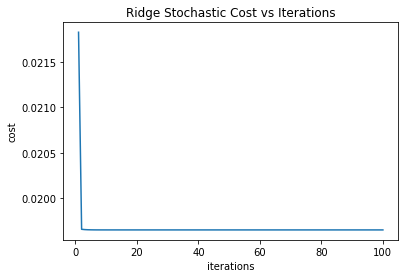

In [34]:
#Ridge Stochastic cost vs iterations
m = [x for x in range(1, num_iter+1)]
plt.plot(m, costlist)
plt.title("Ridge Stochastic Cost vs Iterations")
plt.xlabel('iterations')
plt.ylabel('cost')

Text(0.5, 0, &#39;Theta2&#39;)

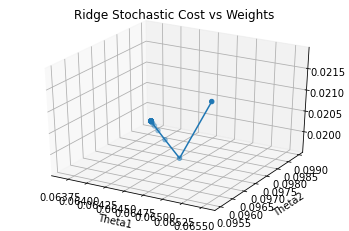

In [35]:
# Ridge Stochastic 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
thetaX = thetalist[:,1]
thetaY = thetalist[:,2]
costlist = np.squeeze(costlist)
ax.scatter(thetaX, thetaY, costlist)
ax.plot(thetaX, thetaY, costlist)
plt.title("Ridge Stochastic Cost vs Weights")
plt.xlabel("Theta1")
plt.ylabel("Theta2")

In [36]:
# printing training and testing mse values for ridge stochastic descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 35.45678698053086
Testing MSE: 26.04488448554084


In [37]:
#Ridge Mini batch propagation

def ridge_mini_propagate(theta, X, Y, m):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    cost -- cost for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    n = theta.shape[0]
    cost = 0
    grad = np.zeros([n,1])
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        #hw = 0
        #for j in range(n):
        #    hw += theta[j] * X[i][j]
        hw = hypothesis(theta, X[i])

        cost += 1/(2*m) * ((hw - Y[i]) ** 2) #compute cost
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        for j in range(n):
            grad[j] = grad[j] + 1 / m * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

    assert(grad.shape == theta.shape)
    cost = np.squeeze(cost)

    return grad, cost

In [38]:
#Ridge Mini batch optimisation

def ridge_mini_optimize(theta, X, Y, num_iter, alpha, m, _lambda):
    """
    This function optimizes theta by running a ridge mini batch gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    _lambda -- Regularization factor
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    costlist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,3])
    
    for i in range(num_iter):
        
        Xbatch = np.random.permutation(X)[0:m]

        # Cost and gradient calculation
        grad, cost = ridge_mini_propagate(theta, Xbatch, Y, m)
        
        # update rule 
        for j in range(theta.shape[0]):
            theta[j] = (1 - alpha * _lambda) * theta[j] - alpha * grad[j]

        costlist[i] = np.squeeze(cost)
        thetalist[i] = np.squeeze(theta)
        
        # Print the cost every 100 training iterations
        if i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return theta, thetalist, costlist

In [39]:
#Mini batch main Implementation
alpha = 0.01
_lambda = 0.25
num_iter = 100
m = 20 #batch size
theta = np.zeros(shape=[x_train.shape[1], 1])

theta, thetalist, costlist = ridge_mini_optimize(theta, x_train, y_train, num_iter, alpha, m, _lambda)
print("Final Weight parameters (normalized):", np.squeeze(theta))

Cost after iteration 0: 0.031944
Cost after iteration 20: 0.013997
Cost after iteration 40: 0.010756
Cost after iteration 60: 0.008513
Cost after iteration 80: 0.009449
Final Weight parameters (normalized): [0.05695947 0.05264678 0.07063637]


Text(0, 0.5, &#39;Cost&#39;)

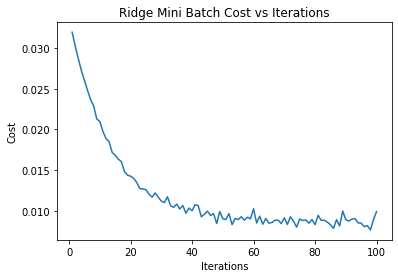

In [40]:
#Ridge Mini batch cost vs iterations
m = [x for x in range(1, num_iter+1)]
plt.plot(m, costlist)
plt.title("Ridge Mini Batch Cost vs Iterations")
plt.xlabel('Iterations')
plt.ylabel('Cost')

Text(0.5, 0, &#39;Theta2&#39;)

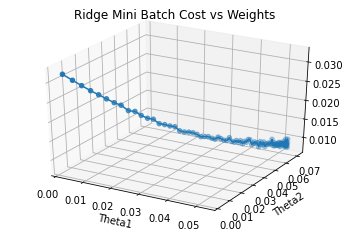

In [41]:
# Ridge Mini batch 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
thetaX = thetalist[:,1]
thetaY = thetalist[:,2]
costlist = np.squeeze(costlist)
ax.scatter(thetaX, thetaY, costlist)
ax.plot(thetaX, thetaY, costlist)
plt.title("Ridge Mini Batch Cost vs Weights")
plt.xlabel("Theta1")
plt.ylabel("Theta2")

In [42]:
# printing training and testing mse values for ridge mini batch descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 48.69155805306529
Testing MSE: 29.844259647566073


##Question-4##
LARS Weight Update Rule Derivation
<img src="LARS Derivation.png">

##Question-5##

In [43]:
#Vectorization based linear regression
def vect_optimize(X, Y):
    """
    This function optimizes theta by vectorization linear regression algorithm
    
    Arguments:
    X -- feature matrix
    Y -- output feature matrix
    
    
    Returns:
    theta -- dictionary containing the weights
    cost -- cost computed during the optimization.

    """
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    cost = 1/2 * (Y.T.dot(Y) - Y.T.dot(X).dot(w) - w.T.dot(X.T).dot(Y)+w.T.dot(X.T).dot(X).dot(w))

    return w, cost

In [44]:
#Vectorization linear regression main Implementation

theta, cost = vect_optimize(x_train, y_train)

print("Final Weight parameters (normalized):", np.squeeze(theta))

Final Weight parameters (normalized): [-0.06221174965802926 0.06644076481714141 0.2730929947197171]


In [45]:
# printing training and testing mse values for vectorized linear descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 17.983339274379286
Testing MSE: 19.053263863791702


In [46]:
#Vectorization based ridge regression
def ridge_vect_optimize(X, Y, _lambda):
    """
    This function optimizes theta by vectorization ridge regression algorithm
    
    Arguments:
    X -- feature matrix
    Y -- output feature matrix
    
    
    Returns:
    theta -- dictionary containing the weights
    cost -- cost computed during the optimization.

    """
    I = np.identity(X.shape[1])
    w = np.linalg.inv(X.T.dot(X) + _lambda*I).dot(X.T).dot(Y)
    cost = 1/2 * (Y.T.dot(Y) - Y.T.dot(X).dot(w) - w.T.dot(X.T).dot(Y)+w.T.dot(X.T).dot(X).dot(w)) + _lambda/2 * w.T.dot(w)

    return w, cost

In [47]:
#Vectorization ridge regression main Implementation

_lambda = 0.25
theta, cost = ridge_vect_optimize(x_train, y_train, _lambda)

print("Final Weight parameters (normalized):", np.squeeze(theta))

Final Weight parameters (normalized): [-0.04959422481696176 0.06354976049786577 0.26539796723151493]


In [48]:
# printing training and testing mse values for vectorized ridge descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 17.905569601135696
Testing MSE: 19.081658305462764


In [49]:
#Vectorization based least angle regression
def ridge_vect_optimize(X, Y, _lambda):
    """
    This function optimizes theta by vectorization ridge regression algorithm
    
    Arguments:
    X -- feature matrix
    Y -- output feature matrix
    
    
    Returns:
    theta -- dictionary containing the weights
    cost -- cost computed during the optimization.

    """
    I = np.identity(X.shape[1])
    w = np.linalg.inv(X.T.dot(X) + _lambda/2*I).dot(X.T).dot(Y)
    cost = 1/2 * (Y.T.dot(Y) - Y.T.dot(X).dot(w) - w.T.dot(X.T).dot(Y)+w.T.dot(X.T).dot(X).dot(w)) + _lambda/2 * np.linalg.norm(w)

    return w, cost

In [50]:
#Vectorization least angle regression main Implementation

_lambda = 0.25
theta, cost = ridge_vect_optimize(x_train, y_train, _lambda)

print("Final Weight parameters (normalized):", np.squeeze(theta))

Final Weight parameters (normalized): [-0.05561530343178321 0.06485241633254207 0.2691291313784406]


In [51]:
# printing training and testing mse values for vectorized least angle regression

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 17.94242916184263
Testing MSE: 19.067197136161056


In [ ]:
##Question 6##